In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
file_names = [f for f in os.listdir('./data_agricola') if f.endswith ('.csv')]
file_names

['cierre_agricola_mun_2015.csv',
 'cierre_agricola_mun_2016.csv',
 'cierre_agricola_mun_2017.csv',
 'cierre_agricola_mun_2018.csv']

In [3]:
tables = [pd.read_csv(os.path.join('./data_agricola', f), encoding = "ISO-8859-1", low_memory=False) for f in file_names]
data1 = pd.concat(tables, axis = 0)

In [4]:
data2 = data1.rename(columns={'Anio':'anio',
                              'Idestado':'clave_entidad',
                              'Nomestado':'entidad',
                              'Idmunicipio':'clave_municipio',
                              'Nommunicipio':'municipio',
                              'Nomcultivo':'cultivo',
                              'Sembrada':'superficie_sembrada_ha',
                              'Volumenproduccion':'produccion_ton',
                              'Valorproduccion':'valor_produccion'})

In [5]:
data3 = data2[['anio', 'clave_entidad', 'entidad', 'clave_municipio', 'municipio', 'cultivo', 'produccion_ton',
               'superficie_sembrada_ha', 'valor_produccion']]

In [6]:
#data3.cultivo.unique()

In [7]:
data4 = data3.loc[(data3.cultivo == 'Maíz grano') | (data3.cultivo == 'Algodón hueso') | (data3.cultivo == 'Naranja')]

In [8]:
data4.cultivo.unique()

array(['Maíz grano', 'Naranja', 'Algodón hueso'], dtype=object)

In [9]:
dataset1 = pd.DataFrame(data4)
dataset1

,anio,clave_entidad,entidad,clave_municipio,municipio,cultivo,produccion_ton,superficie_sembrada_ha,valor_produccion
11,2015,1,Aguascalientes,1,Aguascalientes,Maíz grano,2050.00,265.5,7145603.00
17,2015,1,Aguascalientes,1,Aguascalientes,Maíz grano,3453.10,5053.0,12048591.05
55,2015,1,Aguascalientes,5,Jesús María,Maíz grano,1974.00,271.0,6872500.74
62,2015,1,Aguascalientes,5,Jesús María,Maíz grano,468.66,642.0,1648174.11
78,2015,1,Aguascalientes,10,El Llano,Maíz grano,1122.17,161.0,3921995.37
...,...,...,...,...,...,...,...,...,...
36580,2018,32,Zacatecas,1,Apozol,Maíz grano,858.60,106.0,3005100.00
36586,2018,32,Zacatecas,1,Apozol,Maíz grano,3805.55,917.0,11873316.00
36603,2018,32,Zacatecas,19,Jalpa,Maíz grano,184.90,44.0,630810.39
36612,2018,32,Zacatecas,19,Jalpa,Maíz grano,1365.10,187.0,4171213.21


In [10]:
dataset1.dtypes

anio                        int64
clave_entidad               int64
entidad                    object
clave_municipio             int64
municipio                  object
cultivo                    object
produccion_ton            float64
superficie_sembrada_ha    float64
valor_produccion          float64
dtype: object

In [11]:
dataset1['anio'] = dataset1['anio'].astype(str)
dataset1['clave_entidad'] = dataset1['clave_entidad'].astype(str).str.zfill(2)
dataset1['clave_municipio'] = dataset1['clave_municipio'].astype(str).str.zfill(3)
dataset1['clave_municipio'] = dataset1['clave_entidad'] + dataset1['clave_municipio']
dataset1

,anio,clave_entidad,entidad,clave_municipio,municipio,cultivo,produccion_ton,superficie_sembrada_ha,valor_produccion
11,2015,01,Aguascalientes,01001,Aguascalientes,Maíz grano,2050.00,265.5,7145603.00
17,2015,01,Aguascalientes,01001,Aguascalientes,Maíz grano,3453.10,5053.0,12048591.05
55,2015,01,Aguascalientes,01005,Jesús María,Maíz grano,1974.00,271.0,6872500.74
62,2015,01,Aguascalientes,01005,Jesús María,Maíz grano,468.66,642.0,1648174.11
78,2015,01,Aguascalientes,01010,El Llano,Maíz grano,1122.17,161.0,3921995.37
...,...,...,...,...,...,...,...,...,...
36580,2018,32,Zacatecas,32001,Apozol,Maíz grano,858.60,106.0,3005100.00
36586,2018,32,Zacatecas,32001,Apozol,Maíz grano,3805.55,917.0,11873316.00
36603,2018,32,Zacatecas,32019,Jalpa,Maíz grano,184.90,44.0,630810.39
36612,2018,32,Zacatecas,32019,Jalpa,Maíz grano,1365.10,187.0,4171213.21


In [12]:
dataset1.dtypes

anio                       object
clave_entidad              object
entidad                    object
clave_municipio            object
municipio                  object
cultivo                    object
produccion_ton            float64
superficie_sembrada_ha    float64
valor_produccion          float64
dtype: object

In [13]:
dataset2 = dataset1.groupby(['anio', 'clave_entidad', 'entidad', 'cultivo'], as_index=False).sum()
dataset2

,anio,clave_entidad,entidad,cultivo,produccion_ton,superficie_sembrada_ha,valor_produccion
0,2015,01,Aguascalientes,Maíz grano,60309.42,37209.50,2.033386e+08
1,2015,01,Aguascalientes,Naranja,14.00,2.00,3.080000e+04
2,2015,02,Baja California,Algodón hueso,93432.24,18957.00,6.867821e+08
3,2015,02,Baja California,Maíz grano,1779.46,368.00,6.953674e+06
4,2015,02,Baja California,Naranja,3260.35,265.50,1.135101e+07
...,...,...,...,...,...,...,...
254,2018,30,Veracruz,Maíz grano,1234572.12,570418.00,5.001170e+09
255,2018,30,Veracruz,Naranja,2508486.48,169531.00,4.706613e+09
256,2018,31,Yucatán,Maíz grano,124858.07,114727.72,5.219437e+08
257,2018,31,Yucatán,Naranja,148344.59,11661.86,3.707564e+08


In [14]:
dataset2['rendimiento'] = dataset2['produccion_ton']/dataset2['superficie_sembrada_ha']
dataset2['precio_ton'] = dataset2['valor_produccion']/dataset2['produccion_ton']
dataset2

,anio,clave_entidad,entidad,cultivo,produccion_ton,superficie_sembrada_ha,valor_produccion,rendimiento,precio_ton
0,2015,01,Aguascalientes,Maíz grano,60309.42,37209.50,2.033386e+08,1.620807,3371.589253
1,2015,01,Aguascalientes,Naranja,14.00,2.00,3.080000e+04,7.000000,2200.000000
2,2015,02,Baja California,Algodón hueso,93432.24,18957.00,6.867821e+08,4.928641,7350.590000
3,2015,02,Baja California,Maíz grano,1779.46,368.00,6.953674e+06,4.835489,3907.743804
4,2015,02,Baja California,Naranja,3260.35,265.50,1.135101e+07,12.280038,3481.529848
...,...,...,...,...,...,...,...,...,...
254,2018,30,Veracruz,Maíz grano,1234572.12,570418.00,5.001170e+09,2.164329,4050.934012
255,2018,30,Veracruz,Naranja,2508486.48,169531.00,4.706613e+09,14.796624,1876.276161
256,2018,31,Yucatán,Maíz grano,124858.07,114727.72,5.219437e+08,1.088299,4180.296029
257,2018,31,Yucatán,Naranja,148344.59,11661.86,3.707564e+08,12.720491,2499.291576


In [15]:
dataset = dataset2[['anio', 'clave_entidad', 'entidad', 'cultivo', 'produccion_ton', 'superficie_sembrada_ha', 'rendimiento',
                    'precio_ton']]
dataset

,anio,clave_entidad,entidad,cultivo,produccion_ton,superficie_sembrada_ha,rendimiento,precio_ton
0,2015,01,Aguascalientes,Maíz grano,60309.42,37209.50,1.620807,3371.589253
1,2015,01,Aguascalientes,Naranja,14.00,2.00,7.000000,2200.000000
2,2015,02,Baja California,Algodón hueso,93432.24,18957.00,4.928641,7350.590000
3,2015,02,Baja California,Maíz grano,1779.46,368.00,4.835489,3907.743804
4,2015,02,Baja California,Naranja,3260.35,265.50,12.280038,3481.529848
...,...,...,...,...,...,...,...,...
254,2018,30,Veracruz,Maíz grano,1234572.12,570418.00,2.164329,4050.934012
255,2018,30,Veracruz,Naranja,2508486.48,169531.00,14.796624,1876.276161
256,2018,31,Yucatán,Maíz grano,124858.07,114727.72,1.088299,4180.296029
257,2018,31,Yucatán,Naranja,148344.59,11661.86,12.720491,2499.291576


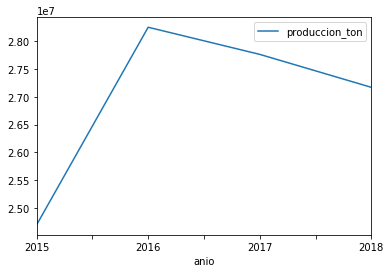

In [16]:
produccion_maiz1 = (dataset[dataset.cultivo == 'Maíz grano']).groupby(['anio']).sum().plot(kind = 'line', y = ['produccion_ton'])
produccion_maiz1

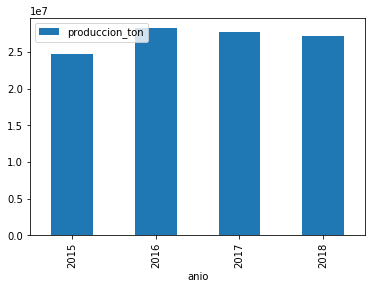

In [29]:
produccion_maiz2 = (dataset[dataset.cultivo == 'Maíz grano']).groupby(['anio']).sum().plot(kind = 'bar', y = ['produccion_ton'], )
produccion_maiz2

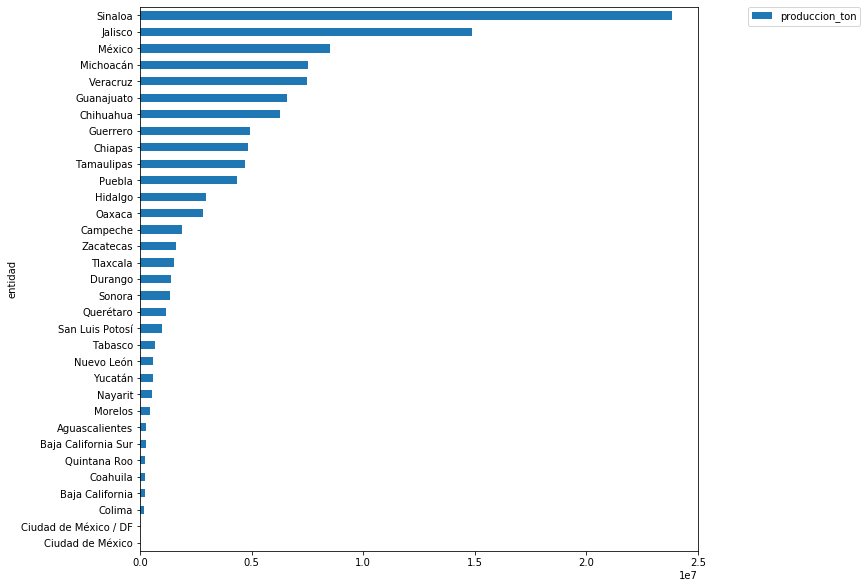

In [17]:
pdn_maiz_2018 = (dataset.loc[(dataset.cultivo == 'Maíz grano') | (dataset.anio == '2018')]).groupby(['entidad']).sum().sort_values('produccion_ton', ascending=True).plot(kind = 'barh', y = ['produccion_ton'], figsize=(10,10)).legend(loc=1, ncol=1, bbox_to_anchor=(1.3, 1.01))
pdn_maiz_2018

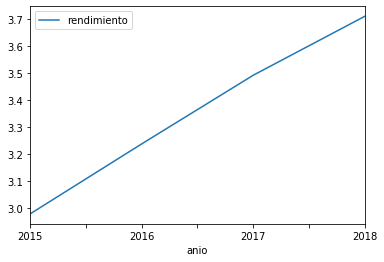

In [18]:
rendimiento_maiz = (dataset[dataset.cultivo == 'Maíz grano']).groupby(['anio']).mean().plot(kind = 'line', y = ['rendimiento'])
rendimiento_maiz

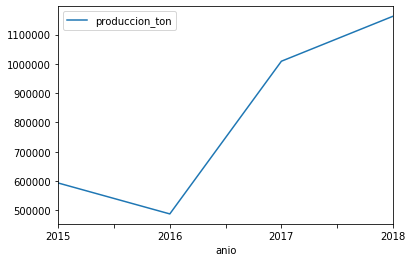

In [19]:
produccion_algodon = (dataset[dataset.cultivo == 'Algodón hueso']).groupby(['anio']).sum().plot(kind = 'line', y = ['produccion_ton'])
produccion_algodon

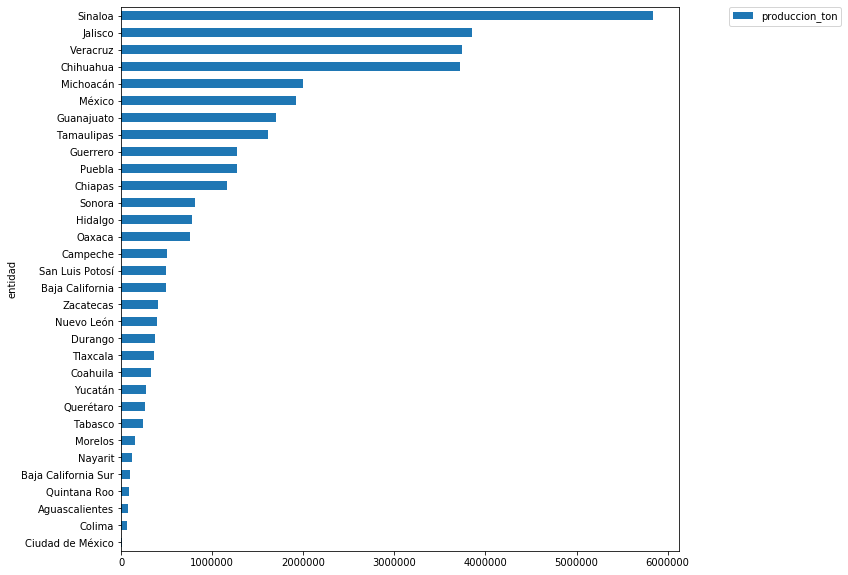

In [27]:
pdn_algodon_2018 = (dataset.loc[(dataset.cultivo == 'Algodón hueso') | (dataset.anio == '2018')]).groupby(['entidad']).sum().sort_values('produccion_ton', ascending=True).plot(kind = 'barh', y = ['produccion_ton'], figsize=(10,10)).legend(loc=1, ncol=1, bbox_to_anchor=(1.3, 1.01))
pdn_algodon_2018

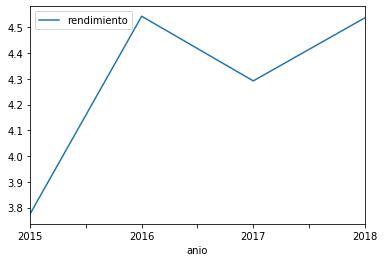

In [21]:
rendimiento_algodon = (dataset[dataset.cultivo == 'Algodón hueso']).groupby(['anio']).mean().plot(kind = 'line', y = ['rendimiento'])
rendimiento_algodon

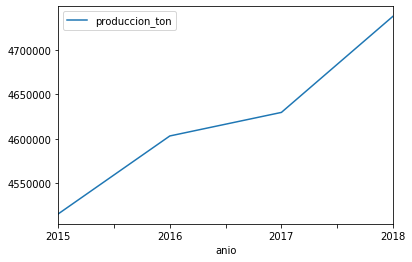

In [22]:
produccion_naranja = (dataset[dataset.cultivo == 'Naranja']).groupby(['anio']).sum().plot(kind = 'line', y = ['produccion_ton'])
produccion_naranja

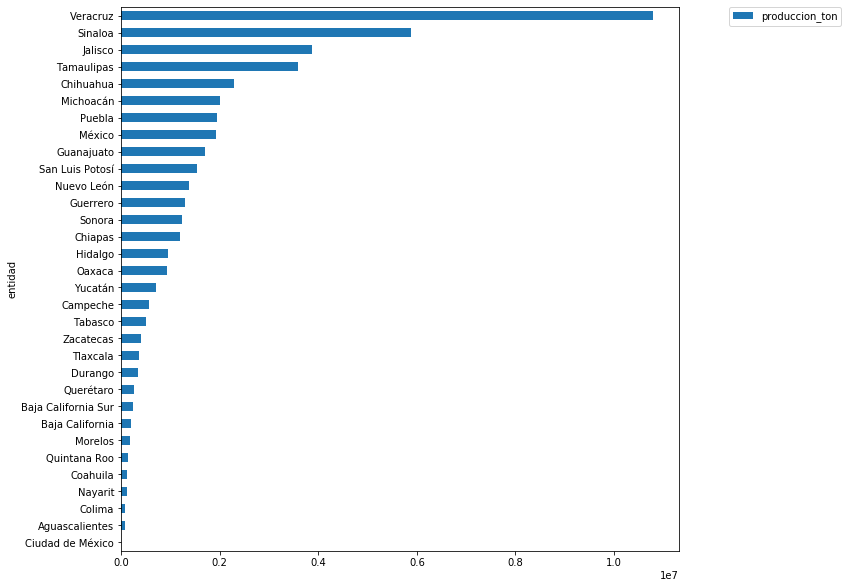

In [23]:
pdn_naranja_2018 = (dataset.loc[(dataset.cultivo == 'Naranja') | (dataset.anio == '2018')]).groupby(['entidad']).sum().sort_values('produccion_ton', ascending=True).plot(kind = 'barh', y = ['produccion_ton'], figsize=(10,10)).legend(loc=1, ncol=1, bbox_to_anchor=(1.3, 1.01))
pdn_naranja_2018

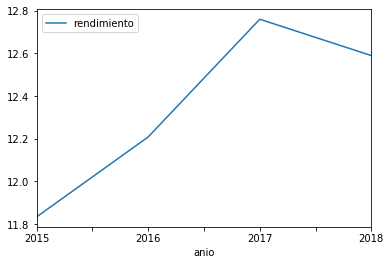

In [24]:
rendimiento_naranja = (dataset[dataset.cultivo == 'Naranja']).groupby(['anio']).mean().plot(kind = 'line', y = ['rendimiento'])
rendimiento_naranja

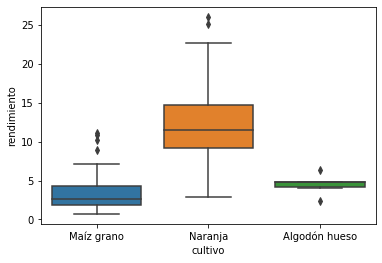

In [25]:
rendimiento = dataset[dataset.anio == '2018']
sns.boxplot(x='cultivo', y='rendimiento', data=rendimiento)

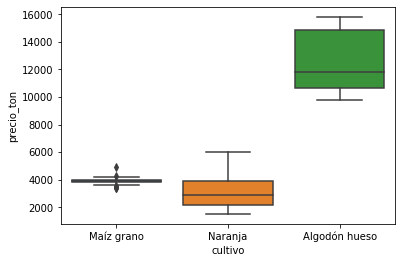

In [26]:
precio_ton = dataset[dataset.anio == '2018']
sns.boxplot(x='cultivo', y='precio_ton', data=precio_ton)

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
bars = sns.barplot(x='entidad', y='produccion_ton', data=data.loc[(data.cultivo == 'Maíz grano') | (data.anio == '2018'))]
bars.set_xticklabels(bars.get_xticklabels(), rotation= 45, horizontalalignment='right')

In [ ]:
sns.distplot(data.produccion_ton, norm_hist=False, kde=True)